In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.special import comb, logsumexp

In [741]:
#Truncation part
def kl_divergence(a, p):
    res = np.log((a/p)**a*((1-a)/(1-p))**(1-a))
    return res

def find_k(t, p, delta):
    k = math.ceil(t*p)
    while k < t:
        kl = kl_divergence((k+1)/t, p)
        if t*kl >= np.log(2/delta):
            break
        else:
            k += 1
    return k

In [635]:
#Low rank part
def final_rank(k, nu, delta):
    if 2**k <= 16*(nu**(-2*k))*(delta**(-2)):
        return 2**k
    else:
        return 16*(nu**(-2*k))*(delta**(-2))

In [349]:
def compute_numbers(memory, each_occupation):
    return memory/each_occupation

In [353]:
MB = compute_numbers(10**6, 8)
GB = compute_numbers(10**9, 8)
TB = compute_numbers(10**12, 8)
PB = compute_numbers(10**15, 8)

981

# Qubit (Dephasing)

In [9]:
def r(p):
    return 1- (2+np.sqrt(2))*p

nu0 = np.cos(np.pi/8)


<>:40: SyntaxWarning: invalid escape sequence '\d'
<>:40: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hjw4\AppData\Local\Temp\ipykernel_23632\401055907.py:40: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Qubit (Dephasing), $\delta=0.01$', fontsize = 20)
C:\Users\hjw4\AppData\Local\Temp\ipykernel_23632\2709672257.py:3: RuntimeWarning: divide by zero encountered in log
  res = a*(np.log(a/p)) + (1-a)*np.log((1-a)/(1-p))
C:\Users\hjw4\AppData\Local\Temp\ipykernel_23632\2709672257.py:3: RuntimeWarning: invalid value encountered in scalar multiply
  res = a*(np.log(a/p)) + (1-a)*np.log((1-a)/(1-p))
C:\Users\hjw4\AppData\Local\Temp\ipykernel_23632\2709672257.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  res = a*(np.log(a/p)) + (1-a)*np.log((1-a)/(1-p))


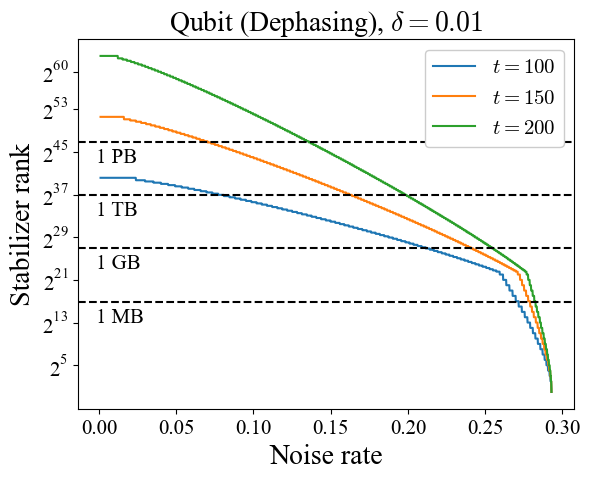

In [647]:
delta = 0.01
t1 = 100
t2 = 150
t3 = 200

p = np.linspace(0.001, (1-np.tan(np.pi/8))/2, 2000)
y1 = []
y2 = []
y3 = []
for i in range(len(p)):
    k1 = find_k(t1, r(p[i]), delta)
    k2 = find_k(t2, r(p[i]), delta)
    k3 = find_k(t3, r(p[i]), delta)
    y1.append(final_rank(k1, nu0, delta))
    y2.append(final_rank(k2, nu0, delta))
    y3.append(final_rank(k3, nu0, delta))
    
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif'] # Prepend 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.xlabel('Noise rate', fontsize = 20)
plt.ylabel('Stabilizer rank', fontsize = 20)
plt.plot(p, y1, label='$t=100$')
plt.plot(p, y2, label='$t=150$')
plt.plot(p, y3, label='$t=200$')
plt.yscale('log', base = 2)
plt.axhline(MB, linestyle='--', color = 'k')
plt.text(-0.002, 2**13, '1 MB', fontsize= 15)
plt.axhline(GB, linestyle='--', color = 'k')
plt.text(-0.002, 2**23, '1 GB', fontsize= 15)
plt.axhline(TB, linestyle='--', color = 'k')
plt.text(-0.002, 2**33, '1 TB', fontsize= 15)
plt.axhline(PB, linestyle='--', color = 'k')
plt.text(-0.002, 2**43, '1 PB', fontsize= 15)

#plt.arrow(x =0.01, y=2**30, dx = 0, dy = 2**33, head_length=2**35 + 2**34, overhang = 0, width = 0.005, length_includes_head=False, color = 'k')
plt.legend(fontsize = 15, framealpha = 1, loc = 'upper right')
plt.xticks(fontsize=15)
plt.yticks([2**5, 2**13, 2**21, 2**29, 2**37, 2**45, 2**53, 2**60], fontsize=15)
plt.title('Qubit (Dephasing), $\delta=0.01$', fontsize = 20)
plt.savefig('Qubit(Dephasing)', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

<>:74: SyntaxWarning: invalid escape sequence '\d'
<>:74: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hjw4\AppData\Local\Temp\ipykernel_23632\602292760.py:74: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Qubit (Dephasing), $\delta=0.01$', fontsize=23)
C:\Users\hjw4\AppData\Local\Temp\ipykernel_23632\3587647202.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  res = np.log((a/p)**a*((1-a)/(1-p))**(1-a))


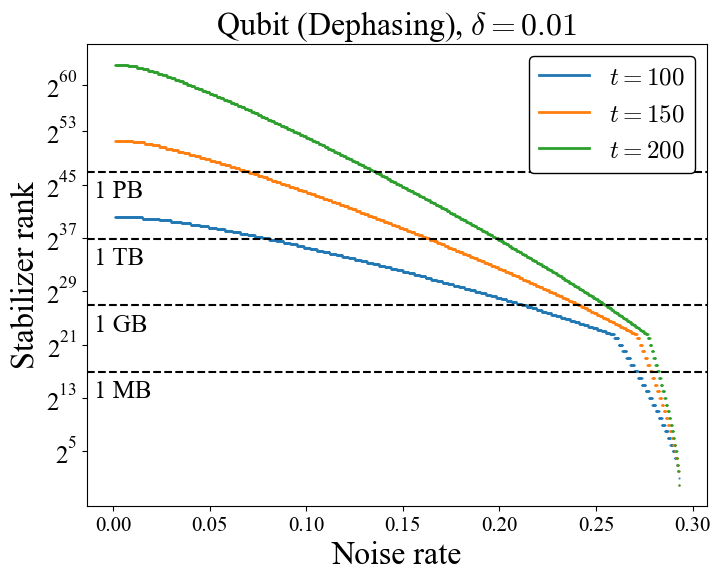

In [747]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

delta = 0.01
t1, t2, t3 = 100, 150, 200

p = np.linspace(0.001, (1 - np.tan(np.pi/8)) / 2, 2000)

y1 = []
y2 = []
y3 = []
for i in range(len(p)):
    k1 = find_k(t1, r(p[i]), delta)
    k2 = find_k(t2, r(p[i]), delta)
    k3 = find_k(t3, r(p[i]), delta)
    y1.append(final_rank(k1, nu0, delta))
    y2.append(final_rank(k2, nu0, delta))
    y3.append(final_rank(k3, nu0, delta))

# -------------------------
# plotting
# -------------------------
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['mathtext.fontset'] = 'cm'

plt.figure(figsize=(8, 6))

# 👉 plot: 점(마커)만 찍기 (선 연결 X)
ln1 = plt.plot(p, y1, linestyle='None', marker='.', markersize=1)[0]
ln2 = plt.plot(p, y2, linestyle='None', marker='.', markersize=1)[0]
ln3 = plt.plot(p, y3, linestyle='None', marker='.', markersize=1)[0]

plt.xlabel('Noise rate', fontsize=23)
plt.ylabel('Stabilizer rank', fontsize=23)
plt.yscale('log', base=2)

# 수평선 + 텍스트 (원래 코드 유지)
plt.axhline(MB, linestyle='--', color='k')
plt.text(-0.01, 2**13, '1 MB', fontsize=18)

plt.axhline(GB, linestyle='--', color='k')
plt.text(-0.01, 2**23, '1 GB', fontsize=18)

plt.axhline(TB, linestyle='--', color='k')
plt.text(-0.01, 2**33, '1 TB', fontsize=18)

plt.axhline(PB, linestyle='--', color='k')
plt.text(-0.01, 2**43, '1 PB', fontsize=18)

# -------------------------
# legend: 실선 proxy handles
# -------------------------
colors = [ln1.get_color(), ln2.get_color(), ln3.get_color()]

proxy_handles = [
    Line2D([0], [0], color=colors[0], lw=2),
    Line2D([0], [0], color=colors[1], lw=2),
    Line2D([0], [0], color=colors[2], lw=2),
]
proxy_labels = [r'$t=100$', r'$t=150$', r'$t=200$']

plt.legend(proxy_handles, proxy_labels,
           fontsize=18,
           framealpha=1.0,
           edgecolor='k',
           handlelength=2.0,
           loc='upper right')

plt.xticks(fontsize=15)
plt.yticks([2**5, 2**13, 2**21, 2**29, 2**37, 2**45, 2**53, 2**60], fontsize=18)

plt.title('Qubit (Dephasing), $\delta=0.01$', fontsize=23)
plt.savefig('Qubit(Dephasing)', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()


In [753]:
np.log2(TB)

36.86313713864835

In [758]:
t  = 200
delta = 0.01
p = np.linspace(0.001, (1 - np.tan(np.pi/8)) / 2, 2000)

for i in range(len(p)):
    k = find_k(t, r(p[i]), delta)
    y = final_rank(k, nu0, delta)
    if y < TB:
        print(p[i])
        break


0.1992946428957821


# Fermion (Particle loss)

In [649]:
def N(p):
    return p**2 + (1-p)**2

def nu1(p):
    res = np.sqrt((2*p**2 - 2*p + 1)/(3*p**2 - 2*p + 1))
    return res

In [651]:
def final_rank_loss(t,p,k,nu,delta):
    k0 = find_k(t, p**2, delta)
    rank0 = final_rank(k0, 1/np.sqrt(2), delta)
    rank1 = final_rank(k, nu, delta)
    if rank0 > rank1:
        return rank1
    else:
        return rank0
    
    

<>:39: SyntaxWarning: invalid escape sequence '\d'
<>:39: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hjw4\AppData\Local\Temp\ipykernel_23632\3513815571.py:39: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Fermion (Particle loss), $\delta=0.01$', fontsize = 20)
C:\Users\hjw4\AppData\Local\Temp\ipykernel_23632\2709672257.py:3: RuntimeWarning: divide by zero encountered in log
  res = a*(np.log(a/p)) + (1-a)*np.log((1-a)/(1-p))
C:\Users\hjw4\AppData\Local\Temp\ipykernel_23632\2709672257.py:3: RuntimeWarning: invalid value encountered in scalar multiply
  res = a*(np.log(a/p)) + (1-a)*np.log((1-a)/(1-p))


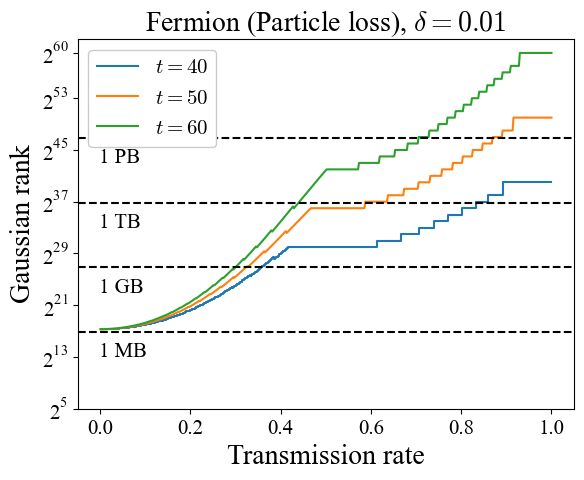

In [655]:
delta = 0.01
t1 = 40
t2 = 50
t3 = 60

p = np.linspace(0.001, 1, 500)
y1 = []
y2 = []
y3 = []
for i in range(len(p)):
    k1 = find_k(t1, N(p[i]), delta)
    k2 = find_k(t2, N(p[i]), delta)
    k3 = find_k(t3, N(p[i]), delta)
    y1.append(final_rank(k1, nu1(p[i]), delta))
    y2.append(final_rank(k2, nu1(p[i]), delta))
    y3.append(final_rank(k3, nu1(p[i]), delta))

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif'] # Prepend 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.xlabel('Transmission rate', fontsize = 20)
plt.ylabel('Gaussian rank', fontsize = 20)
plt.step(p, y1, label='$t=40$')
plt.plot(p, y2, label='$t=50$')
plt.plot(p, y3, label='$t=60$')
plt.yscale('log', base = 2)
plt.axhline(MB, linestyle='--', color = 'k')
plt.text(-0.002, 2**13, '1 MB', fontsize= 15)
plt.axhline(GB, linestyle='--', color = 'k')
plt.text(-0.002, 2**23, '1 GB', fontsize= 15)
plt.axhline(TB, linestyle='--', color = 'k')
plt.text(-0.002, 2**33, '1 TB', fontsize= 15)
plt.axhline(PB, linestyle='--', color = 'k')
plt.text(-0.002, 2**43, '1 PB', fontsize= 15)
#plt.arrow(x =0.03, y=2**30, dx = 0, dy = 2**33, head_length=2**35 + 2**34, overhang = 0, width = 0.017, length_includes_head=False, color = 'k')
plt.legend(fontsize = 15, framealpha = 1)
plt.xticks(fontsize=15)
plt.yticks([2**5, 2**13, 2**21, 2**29, 2**37, 2**45, 2**53, 2**60],fontsize=15)
plt.title('Fermion (Particle loss), $\delta=0.01$', fontsize = 20)
plt.savefig('Fermion(Particle loss)', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

<>:72: SyntaxWarning: invalid escape sequence '\d'
<>:72: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hjw4\AppData\Local\Temp\ipykernel_23632\146118719.py:72: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Fermion (Particle loss), $\delta=0.01$', fontsize=23)


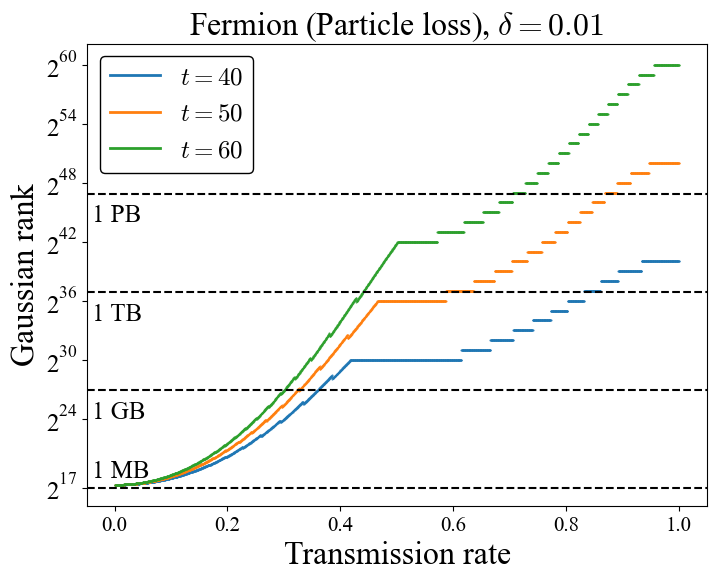

In [743]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# --- (원래 계산 부분: 그대로 두세요) ---
delta = 0.01
t1, t2, t3 = 40, 50, 60
p = np.linspace(0.001, 1, 2000)

y1 = []
y2 = []
y3 = []
for i in range(len(p)):
    k1 = find_k(t1, N(p[i]), delta)
    k2 = find_k(t2, N(p[i]), delta)
    k3 = find_k(t3, N(p[i]), delta)
    y1.append(final_rank(k1, nu1(p[i]), delta))
    y2.append(final_rank(k2, nu1(p[i]), delta))
    y3.append(final_rank(k3, nu1(p[i]), delta))

# --- 그리기 (수정된 부분) ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['mathtext.fontset'] = 'cm'

plt.figure(figsize=(8,6))
# plot: 점(마커)만 그리기 (선 연결 끔)
ln1 = plt.plot(p, y1, linestyle='None', marker='.', markersize=1, alpha=0.9)[0]
ln2 = plt.plot(p, y2, linestyle='None', marker='.', markersize=1, alpha=0.9)[0]
ln3 = plt.plot(p, y3, linestyle='None', marker='.', markersize=1, alpha=0.9)[0]

plt.xlabel('Transmission rate', fontsize=23)
plt.ylabel('Gaussian rank', fontsize=23)
plt.yscale('log', base=2)

# 가로선, 텍스트는 원래대로
plt.axhline(MB, linestyle='--', color='k')
plt.text(-0.04, 2**18, '1 MB', fontsize=18)

plt.axhline(GB, linestyle='--', color='k')
plt.text(-0.04, 2**24, '1 GB', fontsize=18)

plt.axhline(TB, linestyle='--', color='k')
plt.text(-0.04, 2**34, '1 TB', fontsize=18)

plt.axhline(PB, linestyle='--', color='k')
plt.text(-0.04, 2**44, '1 PB', fontsize=18)

# -------------------------
# 범례: 실제 플롯은 마커만이지만,
# 범례에는 "실선" 프록시(Line2D)를 만들어 넣음
# -------------------------
# 플롯에서 사용된 색을 그대로 사용하려면 plotted Line2D에서 색을 가져옴
colors = [ln1.get_color(), ln2.get_color(), ln3.get_color()]

proxy_handles = [
    Line2D([0], [0], color=colors[0], lw=2),  # 실선 아이콘
    Line2D([0], [0], color=colors[1], lw=2),
    Line2D([0], [0], color=colors[2], lw=2),
]
proxy_labels = [r'$t=40$', r'$t=50$', r'$t=60$']

plt.legend(proxy_handles, proxy_labels,
           fontsize=18,
           framealpha=1.0,
           edgecolor='k',
           handlelength=2.0)


plt.xticks(fontsize=15)
plt.yticks([2**17, 2**24, 2**30, 2**36, 2**42, 2**48, 2**54, 2**60], fontsize=18)
plt.title('Fermion (Particle loss), $\delta=0.01$', fontsize=23)
plt.savefig('Fermion(Particle loss)', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()


In [751]:
t = 50
p = 0.915
delta = 0.01

k = find_k(t, N(p), delta)
np.log2(final_rank(k, nu1(p), delta))

49.0

In [613]:
t = 1000
p = 0.8
delta = 0.1

k = find_k(t, p**2, delta)
k

676

In [764]:
t  = 60
delta = 0.01
p = np.linspace(0.001, 1, 2000)

for i in range(len(p)):
    k = find_k(t, N(p[i]), delta)
    y = final_rank(k, nu1(p[i]), delta)
    if y > TB:
        print(p[i])
        break


0.44028014007003496


# Fermion (Dephasing)

In [163]:
def nu2(p):
    res = np.sqrt(1/(1+ (1-2*p)**4))
    return res

In [165]:
def final_rank_dep(t,p,k,nu,delta):
    k0 = find_k(t, (1-2*p)**4, delta)
    rank0 = final_rank(k0, 1/np.sqrt(2), delta)
    rank1 = final_rank(k, nu, delta)
    if rank0 > rank1:
        return rank1
    else:
        return rank0
    

<>:36: SyntaxWarning: invalid escape sequence '\d'
<>:36: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hjw4\AppData\Local\Temp\ipykernel_23632\1658528160.py:36: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Fermion (Dephasing), $\delta=0.01$', fontsize = 20)
C:\Users\hjw4\AppData\Local\Temp\ipykernel_23632\365071904.py:3: RuntimeWarning: divide by zero encountered in log
  res = a*np.log(a/p) + (1-a)*np.log((1-a)/(1-p))
C:\Users\hjw4\AppData\Local\Temp\ipykernel_23632\365071904.py:3: RuntimeWarning: invalid value encountered in scalar multiply
  res = a*np.log(a/p) + (1-a)*np.log((1-a)/(1-p))
C:\Users\hjw4\AppData\Local\Temp\ipykernel_23632\365071904.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  res = a*np.log(a/p) + (1-a)*np.log((1-a)/(1-p))


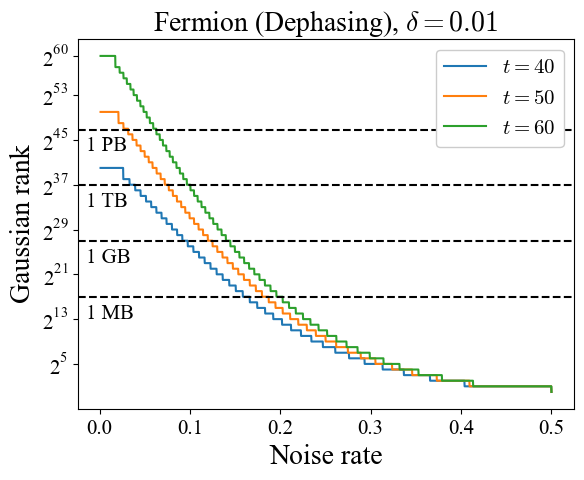

In [361]:
delta = 0.01
t1 = 40
t2 = 50
t3 = 60

p = np.linspace(0.001, 0.5, 2000)
y1 = []
y2 = []
y3 = []
for i in range(len(p)):
    y1.append(final_rank_dep(t1, p[i], t1, nu2(p[i]), delta))
    y2.append(final_rank_dep(t2, p[i], t2, nu2(p[i]), delta))
    y3.append(final_rank_dep(t3, p[i], t3, nu2(p[i]), delta))

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif'] # Prepend 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.xlabel('Noise rate', fontsize = 20)
plt.ylabel('Gaussian rank', fontsize = 20)
plt.plot(p, y1, label='$t=40$')
plt.plot(p, y2, label='$t=50$')
plt.plot(p, y3, label='$t=60$')
plt.yscale('log', base = 2)
plt.axhline(MB, linestyle='--', color = 'k')
plt.text(-0.015, 2**13, '1 MB', fontsize= 15)
plt.axhline(GB, linestyle='--', color = 'k')
plt.text(-0.015, 2**23, '1 GB', fontsize= 15)
plt.axhline(TB, linestyle='--', color = 'k')
plt.text(-0.015, 2**33, '1 TB', fontsize= 15)
plt.axhline(PB, linestyle='--', color = 'k')
plt.text(-0.015, 2**43, '1 PB', fontsize= 15)
#plt.arrow(x =0.01, y=2**30, dx = 0, dy = 2**33, head_length=2**35 + 2**34, overhang = 0, width = 0.0085, length_includes_head=False, color = 'k')
plt.legend(fontsize = 15, framealpha = 1)
plt.xticks(fontsize=15)
plt.yticks([2**5, 2**13, 2**21, 2**29, 2**37, 2**45, 2**53, 2**60],fontsize=15)
plt.title('Fermion (Dephasing), $\delta=0.01$', fontsize = 20)
plt.savefig('Fermion(Dephasing)', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

<>:70: SyntaxWarning: invalid escape sequence '\d'
<>:70: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hjw4\AppData\Local\Temp\ipykernel_23632\759406068.py:70: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Fermion (Dephasing), $\delta=0.01$', fontsize=23)


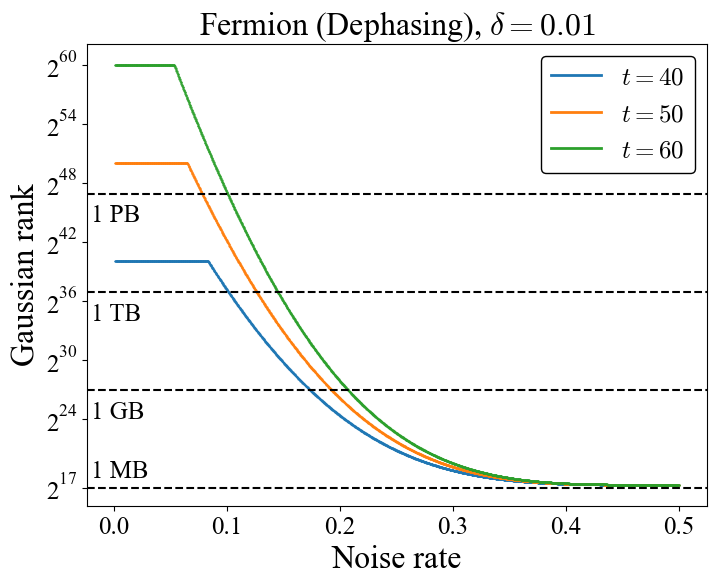

In [749]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

delta = 0.01
t1, t2, t3 = 40, 50, 60

p = np.linspace(0.001, 0.5, 2000)

y1 = []
y2 = []
y3 = []
for i in range(len(p)):
    y1.append(final_rank(t1, nu2(p[i]), delta))
    y2.append(final_rank(t2, nu2(p[i]), delta))
    y3.append(final_rank(t3, nu2(p[i]), delta))

# -------------------------
# plotting
# -------------------------
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['mathtext.fontset'] = 'cm'

plt.figure(figsize=(8, 6))

# 👉 plot에는 "점만" 찍기 (선 연결 X)
ln1 = plt.plot(p, y1, linestyle='None', marker='.', markersize=1)[0]
ln2 = plt.plot(p, y2, linestyle='None', marker='.', markersize=1)[0]
ln3 = plt.plot(p, y3, linestyle='None', marker='.', markersize=1)[0]

plt.xlabel('Noise rate', fontsize=23)
plt.ylabel('Gaussian rank', fontsize=23)
plt.yscale('log', base=2)

# 수평선 + 텍스트 (원래 코드 유지)
plt.axhline(MB, linestyle='--', color='k')
plt.text(-0.02, 2**18, '1 MB', fontsize=18)

plt.axhline(GB, linestyle='--', color='k')
plt.text(-0.02, 2**24, '1 GB', fontsize=18)

plt.axhline(TB, linestyle='--', color='k')
plt.text(-0.02, 2**34, '1 TB', fontsize=18)

plt.axhline(PB, linestyle='--', color='k')
plt.text(-0.02, 2**44, '1 PB', fontsize=18)

# -------------------------
# legend: 실선 proxy handles
# -------------------------
colors = [ln1.get_color(), ln2.get_color(), ln3.get_color()]

proxy_handles = [
    Line2D([0], [0], color=colors[0], lw=2),
    Line2D([0], [0], color=colors[1], lw=2),
    Line2D([0], [0], color=colors[2], lw=2),
]
proxy_labels = [r'$t=40$', r'$t=50$', r'$t=60$']

plt.legend(proxy_handles, proxy_labels,
           fontsize=18,
           framealpha=1.0,
           edgecolor='k',
           handlelength=2.0)

plt.xticks(fontsize=18)
plt.yticks([2**17, 2**24, 2**30, 2**36, 2**42, 2**48, 2**54, 2**60],fontsize=18)

plt.title('Fermion (Dephasing), $\delta=0.01$', fontsize=23)
plt.savefig('Fermion(Dephasing)', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()


In [593]:
t = 1000
p = 0.1
delta = 0.01

np.log2(final_rank(t, nu2(p), delta))

512.5735417505139

In [627]:
t = 50
p = 0.001
delta = 0.01

k = find_k(t, (1-2*p)**4, delta)
k

50

In [768]:
t  = 60
delta = 0.01
p = np.linspace(0.001, 0.5, 2000)

for i in range(len(p)):
    y = final_rank(t, nu2(p[i]), delta)
    if y < TB:
        print(p[i])
        break


0.1452831415707854
